# Centering Analysis in Barriers Variables

## Importing packages

In [ ]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

## Predicting

### Output Barrier: I have no interest in in practicing PA

In [26]:
head(no_interst_barrier_dataset)
summary(no_interst_barrier_dataset[, "PA_barrier_no_interest"])

,sex,age_range,martialStatus,co.resident_range,rooms_range,income_range,scholarity,diabetes,hypertension,dyslipidemia,...,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_barrier_no_interest,pa_number_before
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,2,1,1,1,4,4,0,1,0,...,0,0,0,0,1,0,0,0,no,1
2,2,3,1,2,3,6,4,0,0,0,...,0,1,0,0,0,0,0,0,no,4
3,1,3,1,2,2,5,3,0,0,0,...,0,0,0,1,0,0,0,0,yes,2
4,1,3,1,1,1,3,4,0,0,0,...,0,0,0,0,1,0,0,0,no,2
5,1,2,2,2,2,6,4,0,0,0,...,1,0,0,0,0,0,0,0,no,2
6,2,3,2,2,2,6,6,0,0,0,...,1,0,0,0,0,0,0,0,no,3


no  yes 
1146   96

####  Outliers

- Outlier: Strange Dont Practice

In [ ]:
no_interst_barrier_dataset_copy <-no_interst_barrier_dataset
no_interst_barrier_dataset_copy["outlier"] <- strange_dp
outliers_result_sdp <- outliers_checker(distances_sdp,no_interst_barrier_dataset_copy, "PA_barrier_no_interest")

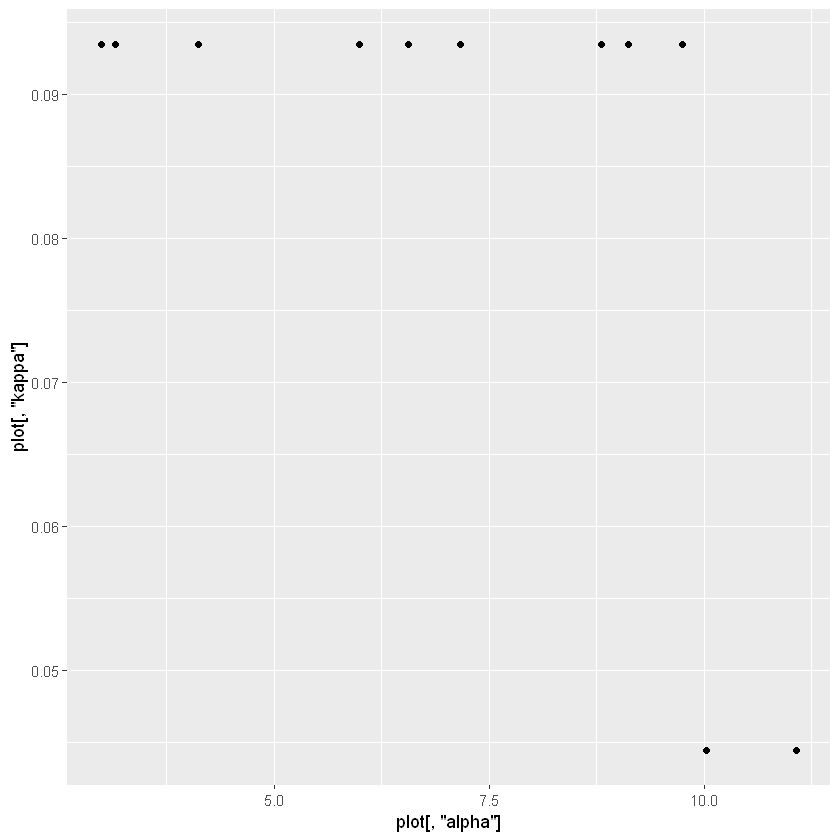

In [28]:
plot <- outliers_result_sdp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

- Outlier: Strange Practice

In [ ]:
no_interst_barrier_dataset_copy <-no_interst_barrier_dataset
no_interst_barrier_dataset_copy["outlier"] <- strange_p
outliers_result_sp <- outliers_checker(distances_sp,no_interst_barrier_dataset_copy, "PA_barrier_no_interest")

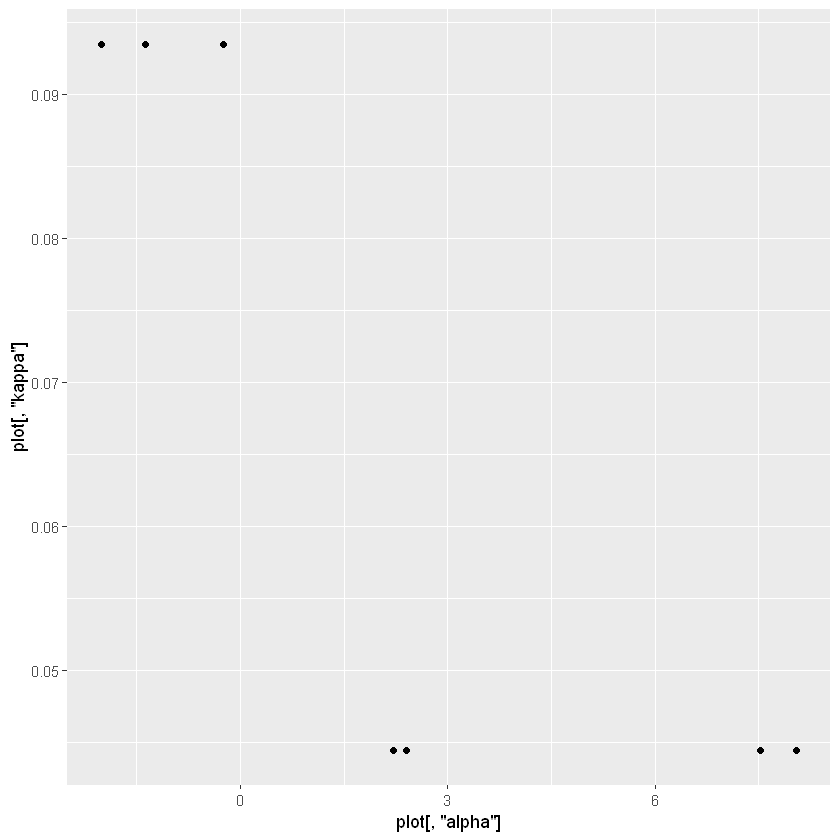

In [116]:
plot <- outliers_result_sp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

- New Train and Test:
The outliers check in the strange dont need to delete records

In [29]:
no_interst_barrier_train <- outliers_result_sdp$best_model$train
no_interst_barrier_test <- outliers_result_sdp$best_model$test

#### RF: Kappa with 50% of probability threshold

In [30]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = no_interst_barrier_train,
    test_data=no_interst_barrier_test,
    yname="PA_barrier_no_interest",
    length = 15
)
print(model$matrix)


Setting levels: control = 1, case = 2

Setting direction: controls < cases



Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  341  25
       yes   2   3
                                          
               Accuracy : 0.9272          
                 95% CI : (0.8959, 0.9515)
    No Information Rate : 0.9245          
    P-Value [Acc > NIR] : 0.4719          
                                          
                  Kappa : 0.1627          
                                          
 Mcnemar's Test P-Value : 2.297e-05       
                                          
            Sensitivity : 0.9942          
            Specificity : 0.1071          
         Pos Pred Value : 0.9317          
         Neg Pred Value : 0.6000          
              Precision : 0.9317          
                 Recall : 0.9942          
                     F1 : 0.9619          
             Prevalence : 0.9245          
         Detection Rate : 0.9191          
   Detection Prevalence : 0.9865          
      Balanced Accuracy : 0.55

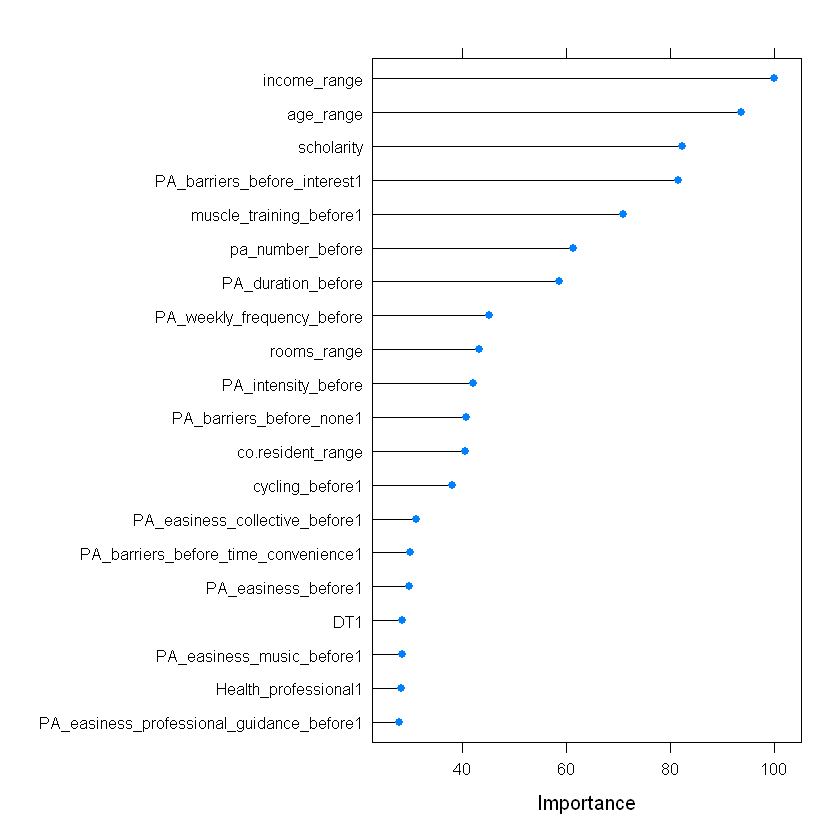

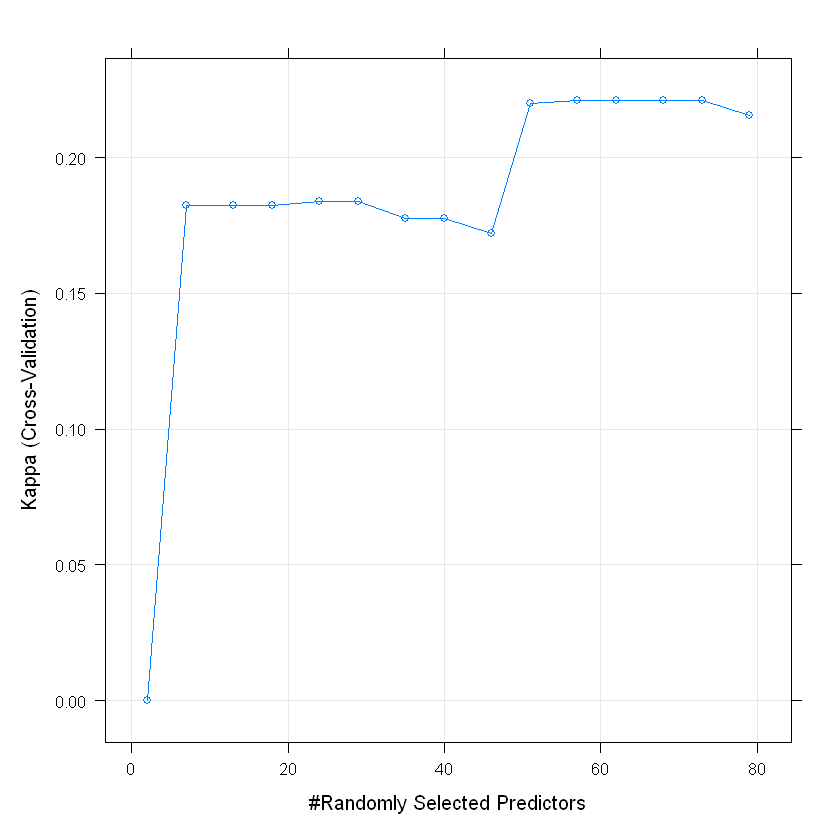

In [31]:
plot(varImp(model$result), top=20)
plot(model$result)

#### RF: Kappa with antoher probability threshold

Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA

[1] 0.9
Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  259  12
       yes  84  16
                                          
               Accuracy : 0.7412          
                 95% CI : (0.6935, 0.7851)
    No Information Rate : 0.9245          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1497          
                                          
 Mcnemar's Test P-Value : 4.28e-13        
                                          
            Sensitivity : 0.7551          
            Specificity : 0.5714          
         Pos Pred Value : 0.9557          
         Neg Pred Value : 0.1600          
              Precision : 0.9557          
                 Recall : 0.7551          
                     F1 : 0.8436          
             Prevalence : 0.9245          
         Detection Rate : 0.6981          
   Detection Prevalence : 0.7305          
      Balanced Accurac

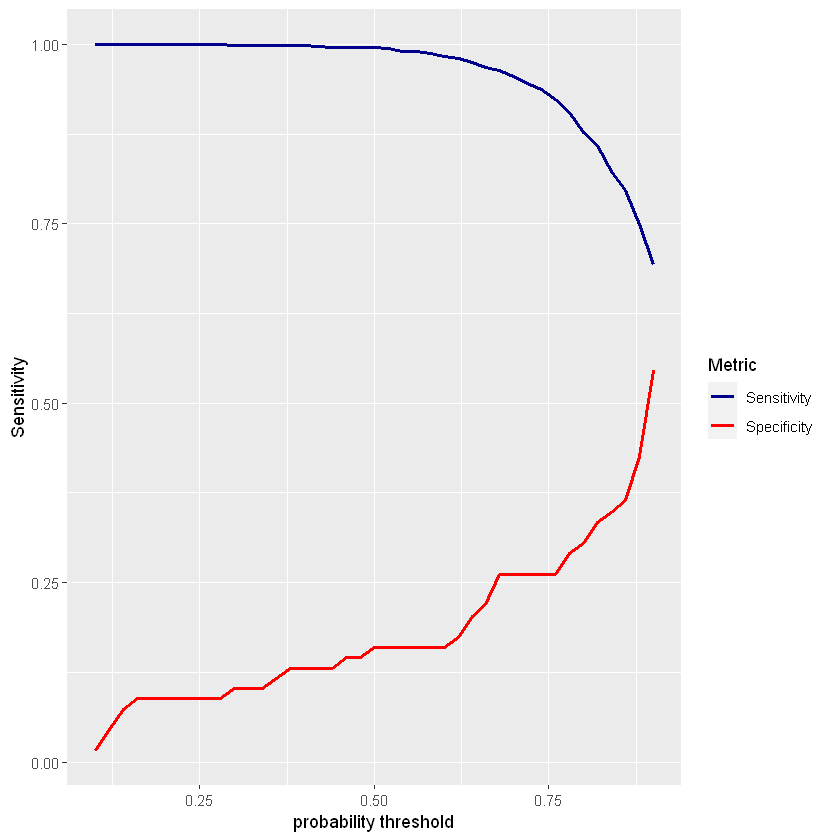

In [32]:
set.seed(2)
model <- fit_model_thresholder(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid",  classProbs=TRUE, savePredictions=TRUE),
    train_data = no_interst_barrier_train,
    test_data=no_interst_barrier_test,
    yname="PA_barrier_no_interest",
    length = 15,
    best_th = f2
)
print(model$matrix)


### Output Barrier: PA takes too much time from family responabilities

In [121]:
head(family_responsabilities_barrier_dataset)
summary(family_responsabilities_barrier_dataset[, "PA_barrier_family_responsabilities"])

,sex,age_range,martialStatus,co.resident_range,rooms_range,income_range,scholarity,diabetes,hypertension,dyslipidemia,...,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_barrier_family_responsabilities,pa_number_before
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,2,1,1,1,4,4,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,3,1,2,3,6,4,0,0,0,...,0,1,0,0,0,0,0,0,0,4
3,1,3,1,2,2,5,3,0,0,0,...,0,0,0,1,0,0,0,0,0,2
4,1,3,1,1,1,3,4,0,0,0,...,0,0,0,0,1,0,0,0,0,2
5,1,2,2,2,2,6,4,0,0,0,...,1,0,0,0,0,0,0,0,0,2
6,2,3,2,2,2,6,6,0,0,0,...,1,0,0,0,0,0,0,0,1,3


0    1 
1084  158

####  Outliers

- Outlier: Strange Dont Practice

In [ ]:
family_responsabilities_barrier_dataset_copy <-family_responsabilities_barrier_dataset
family_responsabilities_barrier_dataset_copy["outlier"] <- strange_dp
outliers_result_sdp <- outliers_checker(distances_sdp,family_responsabilities_barrier_dataset_copy, "PA_barrier_family_responsabilities")

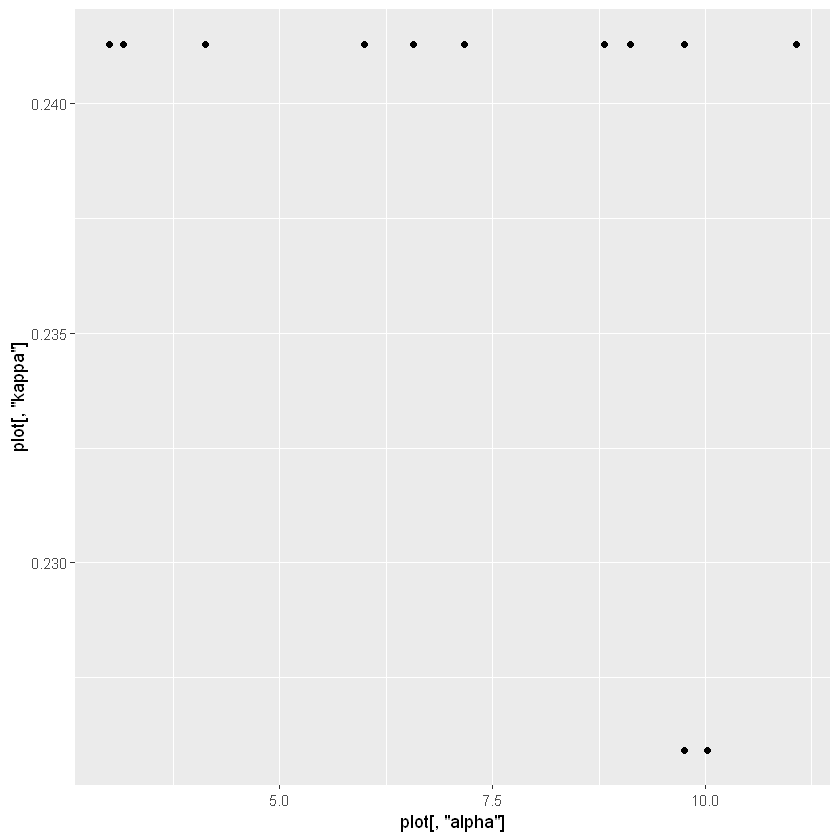

In [19]:
plot <- outliers_result_sdp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

- Outlier: Strange Practice

In [ ]:
family_responsabilities_barrier_dataset_copy <-family_responsabilities_barrier_dataset
family_responsabilities_barrier_dataset_copy["outlier"] <- strange_p
outliers_result_sp <- outliers_checker(distances_sp,family_responsabilities_barrier_dataset_copy, "PA_barrier_family_responsabilities")

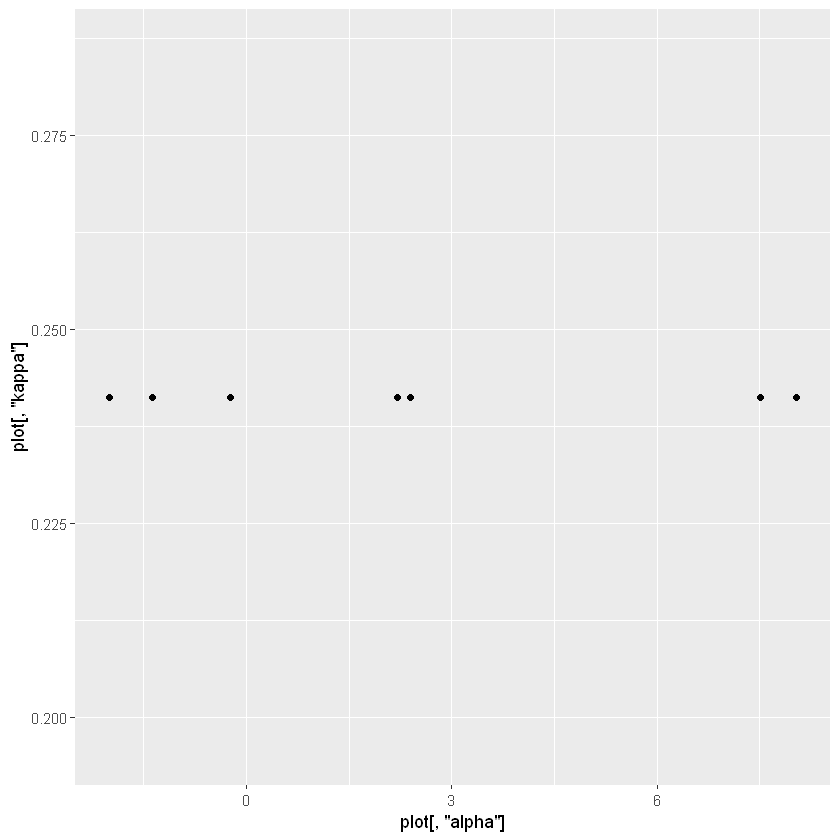

In [21]:
plot <- outliers_result_sp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

- New Train and Test:
The outliers check in the strange dont need to delete records

In [22]:
family_responsabilities_barrier_train <- outliers_result_sdp$best_model$train
family_responsabilities_barrier_test <- outliers_result_sdp$best_model$test

#### RF: Kappa with 50% of probability threshold

In [23]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = family_responsabilities_barrier_train,
    test_data=family_responsabilities_barrier_test,
    yname="PA_barrier_family_responsabilities",
    length = 15
)
print(model$matrix)


Setting levels: control = 1, case = 2

Setting direction: controls < cases



Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  316  26
       yes   9  21
                                          
               Accuracy : 0.9059          
                 95% CI : (0.8716, 0.9336)
    No Information Rate : 0.8737          
    P-Value [Acc > NIR] : 0.032565        
                                          
                  Kappa : 0.4958          
                                          
 Mcnemar's Test P-Value : 0.006841        
                                          
            Sensitivity : 0.9723          
            Specificity : 0.4468          
         Pos Pred Value : 0.9240          
         Neg Pred Value : 0.7000          
              Precision : 0.9240          
                 Recall : 0.9723          
                     F1 : 0.9475          
             Prevalence : 0.8737          
         Detection Rate : 0.8495          
   Detection Prevalence : 0.9194          
      Balanced Accuracy : 0.70

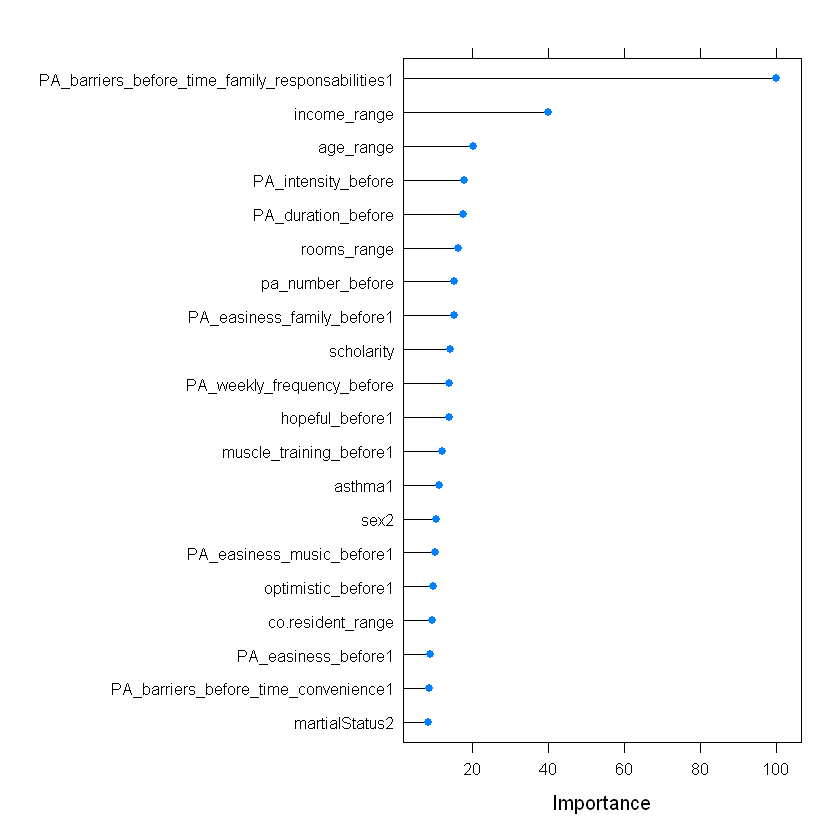

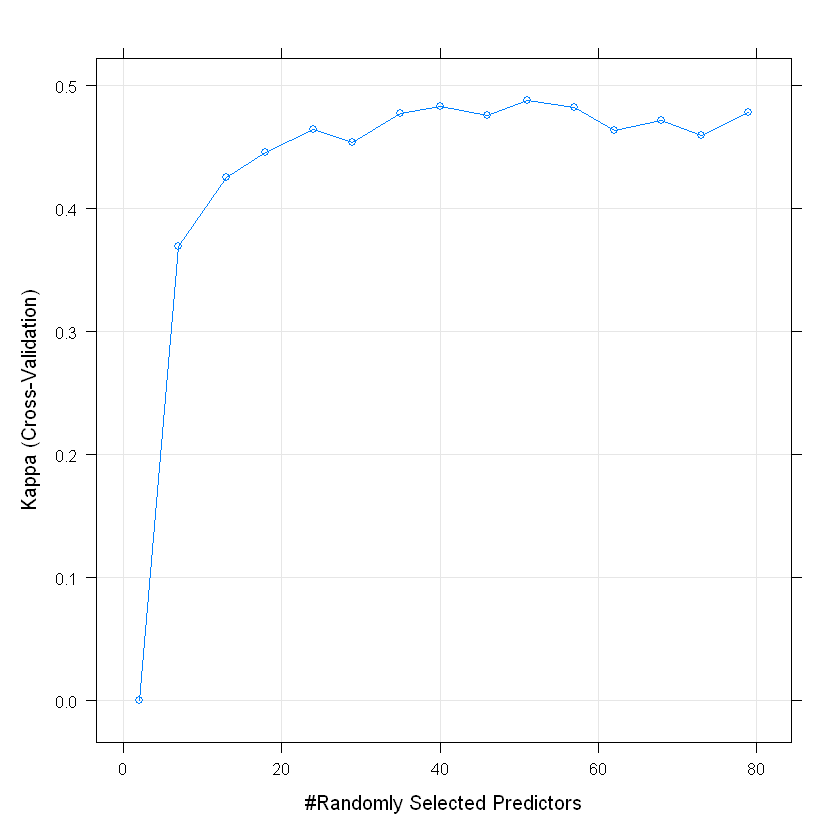

In [24]:
plot(varImp(model$result), top=20)
plot(model$result)

#### RF: Kappa with antoher probability threshold

Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"


[1] 0.86
Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  232  14
       yes  93  33
                                          
               Accuracy : 0.7124          
                 95% CI : (0.6635, 0.7579)
    No Information Rate : 0.8737          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.242           
                                          
 Mcnemar's Test P-Value : 4.68e-14        
                                          
            Sensitivity : 0.7138          
            Specificity : 0.7021          
         Pos Pred Value : 0.9431          
         Neg Pred Value : 0.2619          
              Precision : 0.9431          
                 Recall : 0.7138          
                     F1 : 0.8126          
             Prevalence : 0.8737          
         Detection Rate : 0.6237          
   Detection Prevalence : 0.6613          
      Balanced Accura

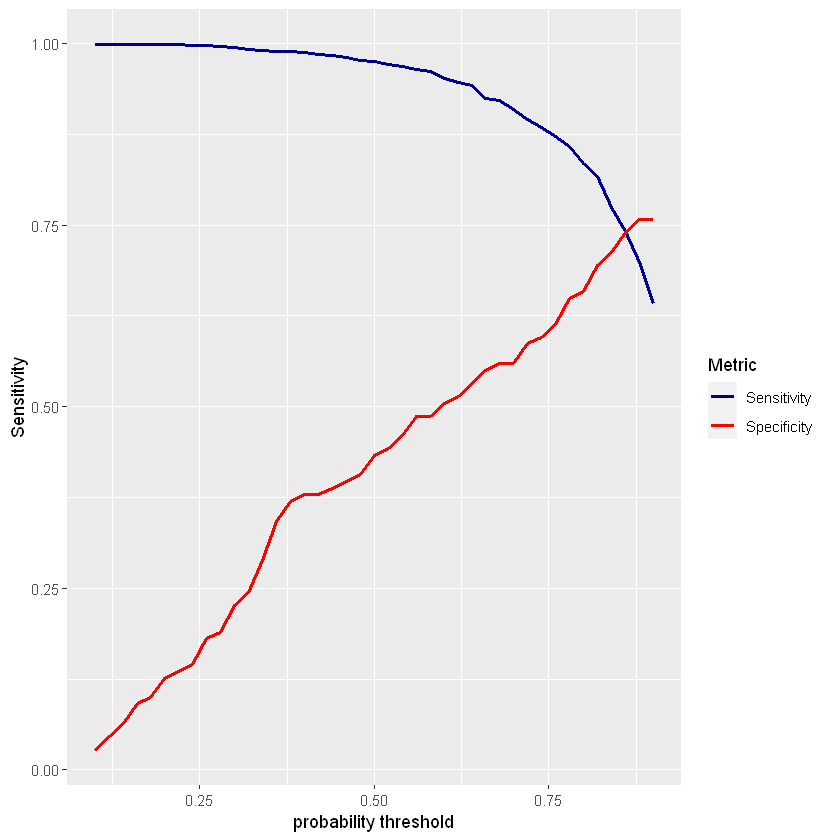

In [25]:
set.seed(2)
model <- fit_model_thresholder(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid",  classProbs=TRUE, savePredictions=TRUE),
    train_data = family_responsabilities_barrier_train,
    test_data=family_responsabilities_barrier_test,
    yname="PA_barrier_family_responsabilities",
    length = 15,
    best_th = f2
)
print(model$matrix)


### Output Barrier: I percieve barriers

In [149]:
head(percieve_barriers_dataset)
summary(percieve_barriers_dataset[, "PA_perceive_barriers"])

,sex,age_range,martialStatus,co.resident_range,rooms_range,income_range,scholarity,diabetes,hypertension,dyslipidemia,...,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_dont_perceive_barriers,pa_number_before
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,2,1,1,1,4,4,0,1,0,...,0,0,0,0,1,0,0,0,no,1
2,2,3,1,2,3,6,4,0,0,0,...,0,1,0,0,0,0,0,0,no,4
3,1,3,1,2,2,5,3,0,0,0,...,0,0,0,1,0,0,0,0,no,2
4,1,3,1,1,1,3,4,0,0,0,...,0,0,0,0,1,0,0,0,no,2
5,1,2,2,2,2,6,4,0,0,0,...,1,0,0,0,0,0,0,0,no,2
6,2,3,2,2,2,6,6,0,0,0,...,1,0,0,0,0,0,0,0,no,3


no yes 
945 297

####  Outliers

- Outlier: Strange Dont Practice

In [153]:
percieve_barriers_dataset_copy <-percieve_barriers_dataset
percieve_barriers_dataset_copy["outlier"] <- strange_dp
outliers_result_sdp <- outliers_checker(distances_sdp,percieve_barriers_dataset_copy, "PA_perceive_barriers")

Warning message in train_copy[train_copy$outlier, ]$outlier & rejected:
"comprimento do objeto maior não é múltiplo do comprimento do objeto menor"
Setting levels: control = 1, case = 2

Setting direction: controls < cases

Warning message in train_copy[train_copy$outlier, ]$outlier & rejected:
"comprimento do objeto maior não é múltiplo do comprimento do objeto menor"
Setting levels: control = 1, case = 2

Setting direction: controls < cases

Warning message in train_copy[train_copy$outlier, ]$outlier & rejected:
"comprimento do objeto maior não é múltiplo do comprimento do objeto menor"
Setting levels: control = 1, case = 2

Setting direction: controls < cases

Warning message in train_copy[train_copy$outlier, ]$outlier & rejected:
"comprimento do objeto maior não é múltiplo do comprimento do objeto menor"
Setting levels: control = 1, case = 2

Setting direction: controls < cases

Warning message in train_copy[train_copy$outlier, ]$outlier & rejected:
"comprimento do objeto maior não

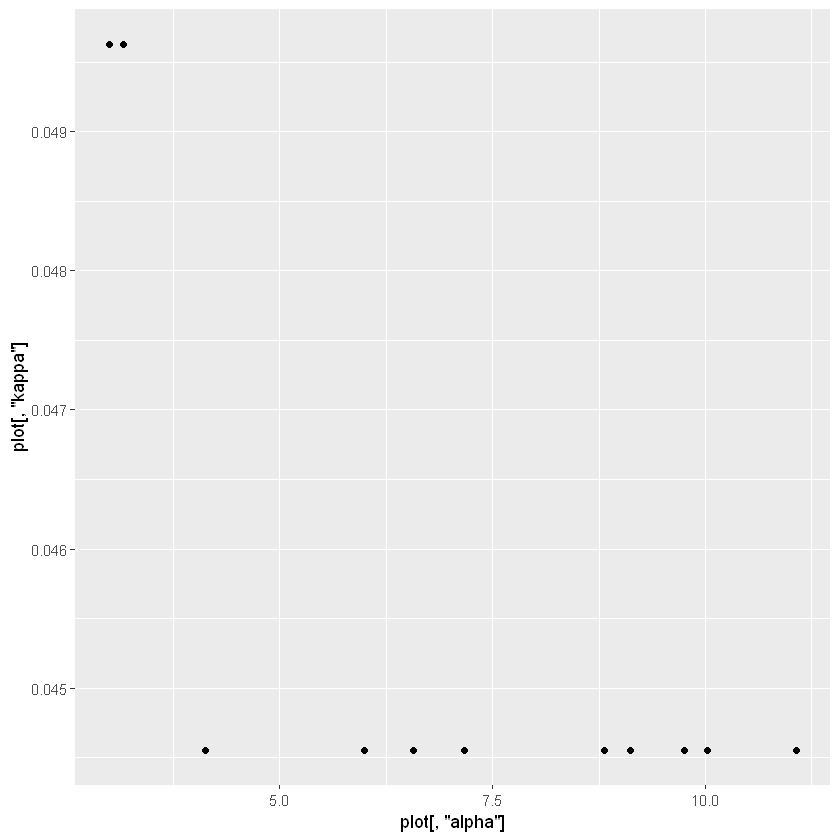

In [125]:
plot <- outliers_result_sdp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

- Outlier: Strange Practice

In [152]:
percieve_barriers_dataset_copy <-percieve_barriers_dataset
percieve_barriers_dataset_copy["outlier"] <- strange_p
outliers_result_sp <- outliers_checker(distances_sp,percieve_barriers_dataset_copy, "PA_perceive_barriers")

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases



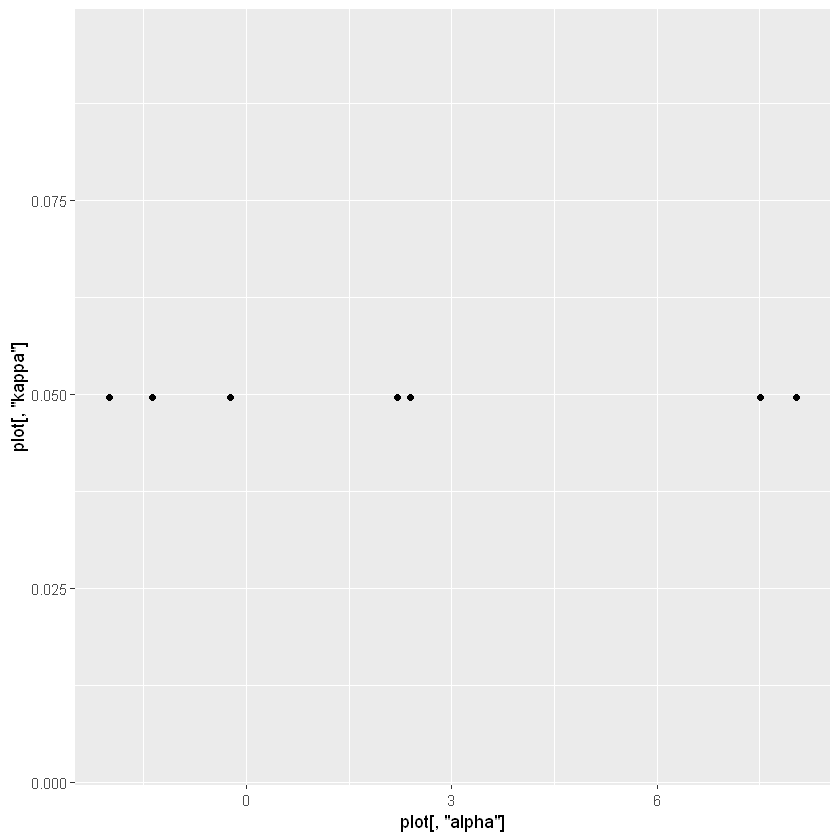

In [127]:
plot <- outliers_result_sp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

- New Train and Test:
The outliers check in the strange dont need to delete records

In [154]:
percieve_barriers_train <- outliers_result_sdp$best_model$train
percieve_barriers_test <- outliers_result_sdp$best_model$test

#### RF: Kappa with 50% of probability threshold

In [130]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = percieve_barriers_train,
    test_data=percieve_barriers_test,
    yname="PA_perceive_barriers",
    length = 15
)
print(model$matrix)


Setting levels: control = 1, case = 2

Setting direction: controls < cases



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 266  65
         1  17  24
                                         
               Accuracy : 0.7796         
                 95% CI : (0.734, 0.8207)
    No Information Rate : 0.7608         
    P-Value [Acc > NIR] : 0.216          
                                         
                  Kappa : 0.2571         
                                         
 Mcnemar's Test P-Value : 2.1e-07        
                                         
            Sensitivity : 0.9399         
            Specificity : 0.2697         
         Pos Pred Value : 0.8036         
         Neg Pred Value : 0.5854         
              Precision : 0.8036         
                 Recall : 0.9399         
                     F1 : 0.8664         
             Prevalence : 0.7608         
         Detection Rate : 0.7151         
   Detection Prevalence : 0.8898         
      Balanced Accuracy : 0.6048         
        

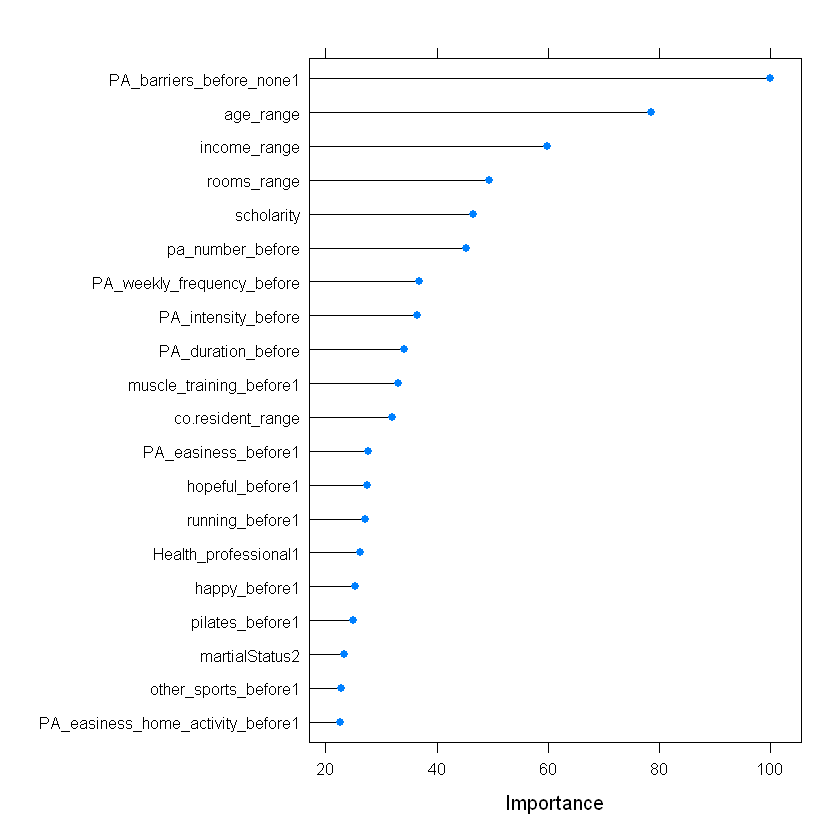

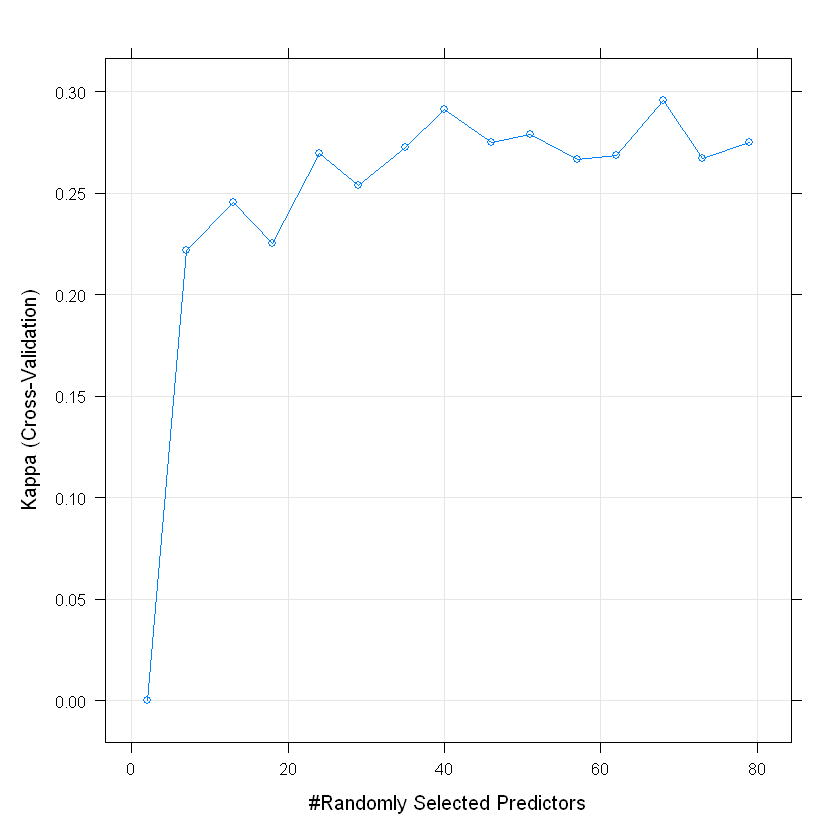

In [131]:
plot(varImp(model$result), top=20)
plot(model$result)

#### RF: Kappa with antoher probability threshold

Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA

[1] 0.72
Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  199  32
       yes  84  57
                                          
               Accuracy : 0.6882          
                 95% CI : (0.6384, 0.7349)
    No Information Rate : 0.7608          
    P-Value [Acc > NIR] : 0.9994          
                                          
                  Kappa : 0.2863          
                                          
 Mcnemar's Test P-Value : 2.188e-06       
                                          
            Sensitivity : 0.7032          
            Specificity : 0.6404          
         Pos Pred Value : 0.8615          
         Neg Pred Value : 0.4043          
              Precision : 0.8615          
                 Recall : 0.7032          
                     F1 : 0.7743          
             Prevalence : 0.7608          
         Detection Rate : 0.5349          
   Detection Prevalence : 0.6210          
      Balanced Accura

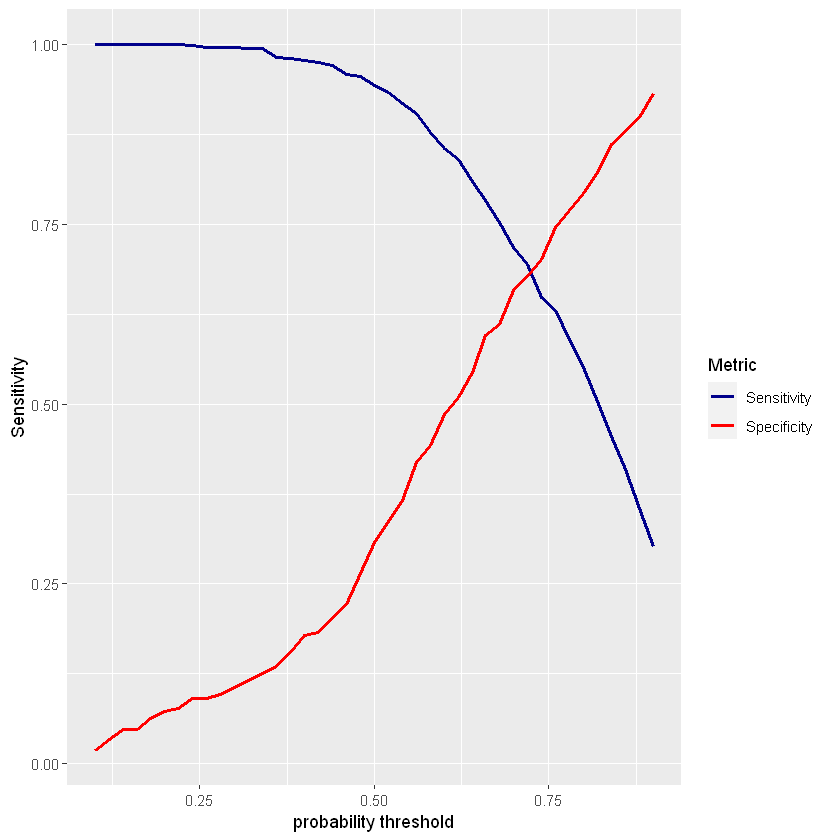

In [155]:
set.seed(2)
model <- fit_model_thresholder(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid",  classProbs=TRUE, savePredictions=TRUE),
    train_data = percieve_barriers_train,
    test_data=percieve_barriers_test,
    yname="PA_perceive_barriers",
    length = 15,
    best_th = f2
)
print(model$matrix)


### Output Barrier: hard work barrier

In [5]:
head(hard_work_barrier_dataset)
summary(hard_work_barrier_dataset[, "PA_barrier_hard_work"])

,sex,age_range,martialStatus,co.resident_range,rooms_range,income_range,scholarity,diabetes,hypertension,dyslipidemia,...,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_barrier_hard_work,pa_number_before
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,2,1,1,1,4,4,0,1,0,...,0,0,0,0,1,0,0,0,yes,1
2,2,3,1,2,3,6,4,0,0,0,...,0,1,0,0,0,0,0,0,no,4
3,1,3,1,2,2,5,3,0,0,0,...,0,0,0,1,0,0,0,0,no,2
4,1,3,1,1,1,3,4,0,0,0,...,0,0,0,0,1,0,0,0,no,2
5,1,2,2,2,2,6,4,0,0,0,...,1,0,0,0,0,0,0,0,no,2
6,2,3,2,2,2,6,6,0,0,0,...,1,0,0,0,0,0,0,0,no,3


no yes 
901 341

####  Outliers

- Outlier: Strange Dont Practice

In [ ]:
hard_work_barrier_dataset_copy <-hard_work_barrier_dataset
hard_work_barrier_dataset_copy["outlier"] <- strange_dp
outliers_result_sdp <- outliers_checker(distances_sdp,hard_work_barrier_dataset_copy, "PA_barrier_hard_work")

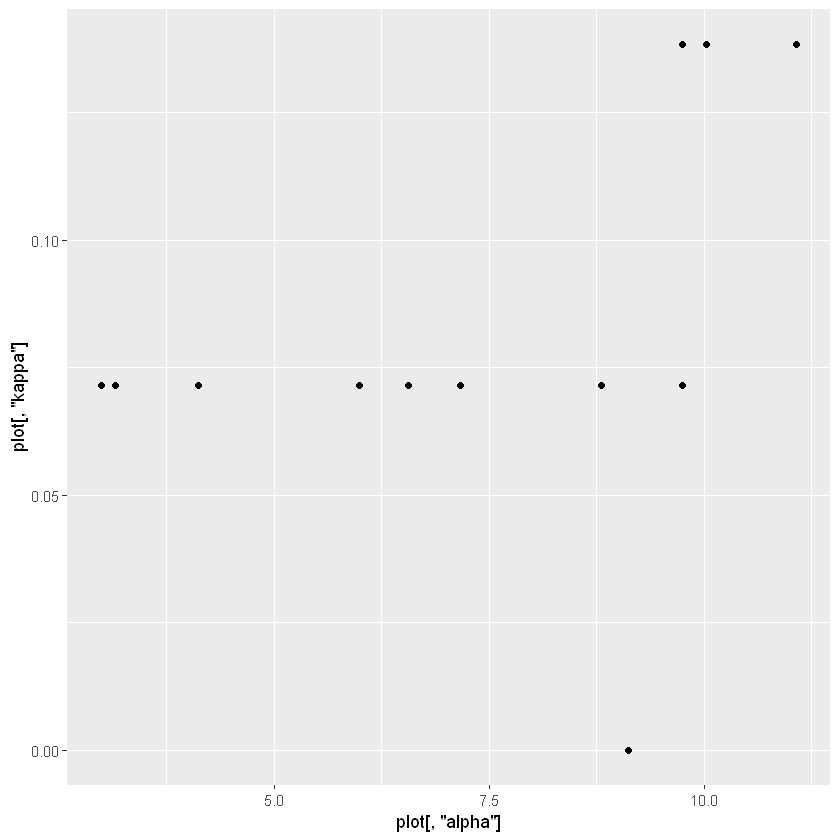

In [7]:
plot <- outliers_result_sdp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

- Outlier: Strange Practice

In [8]:
hard_work_barrier_dataset_copy <-hard_work_barrier_dataset
hard_work_barrier_dataset_copy["outlier"] <- strange_p
outliers_result_sp <- outliers_checker(distances_sp,hard_work_barrier_dataset_copy, "PA_barrier_hard_work")

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases



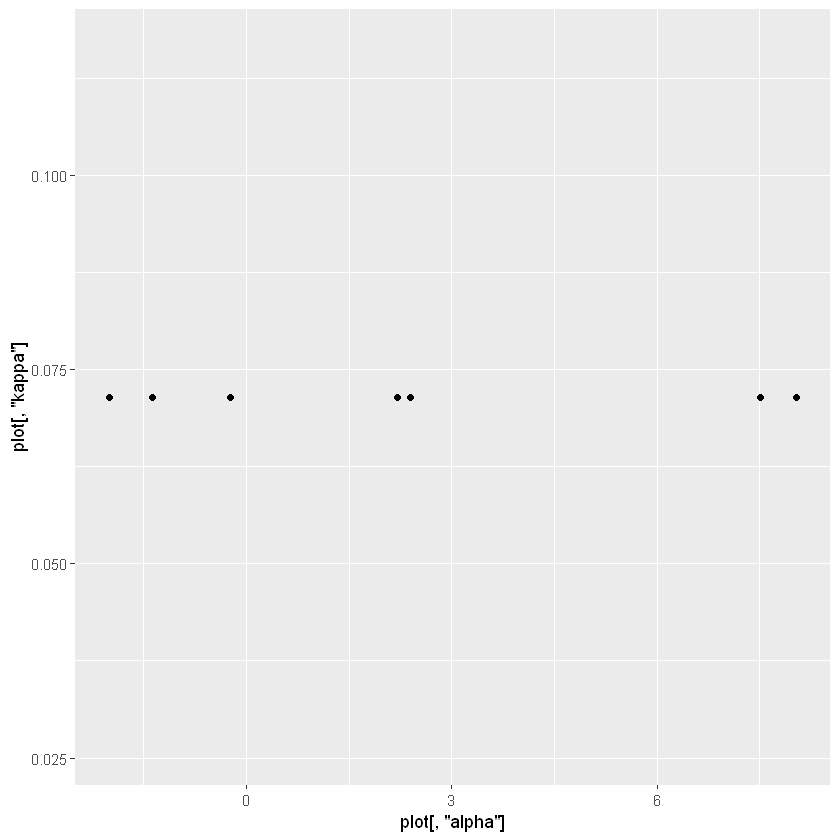

In [9]:
plot <- outliers_result_sp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

- New Train and Test:
The outliers check in the strange dont need to delete records

In [13]:
hard_work_barriers_train <- outliers_result_sdp$best_model$train
hard_work_barriers_test <- outliers_result_sdp$best_model$test

#### RF: Kappa with 50% of probability threshold

In [14]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = hard_work_barriers_train,
    test_data=hard_work_barriers_test,
    yname="PA_barrier_hard_work",
    length = 15
)
print(model$matrix)


Setting levels: control = 1, case = 2

Setting direction: controls < cases



Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  257  77
       yes  13  25
                                          
               Accuracy : 0.7581          
                 95% CI : (0.7112, 0.8007)
    No Information Rate : 0.7258          
    P-Value [Acc > NIR] : 0.08947         
                                          
                  Kappa : 0.2447          
                                          
 Mcnemar's Test P-Value : 3.12e-11        
                                          
            Sensitivity : 0.9519          
            Specificity : 0.2451          
         Pos Pred Value : 0.7695          
         Neg Pred Value : 0.6579          
              Precision : 0.7695          
                 Recall : 0.9519          
                     F1 : 0.8510          
             Prevalence : 0.7258          
         Detection Rate : 0.6909          
   Detection Prevalence : 0.8978          
      Balanced Accuracy : 0.59

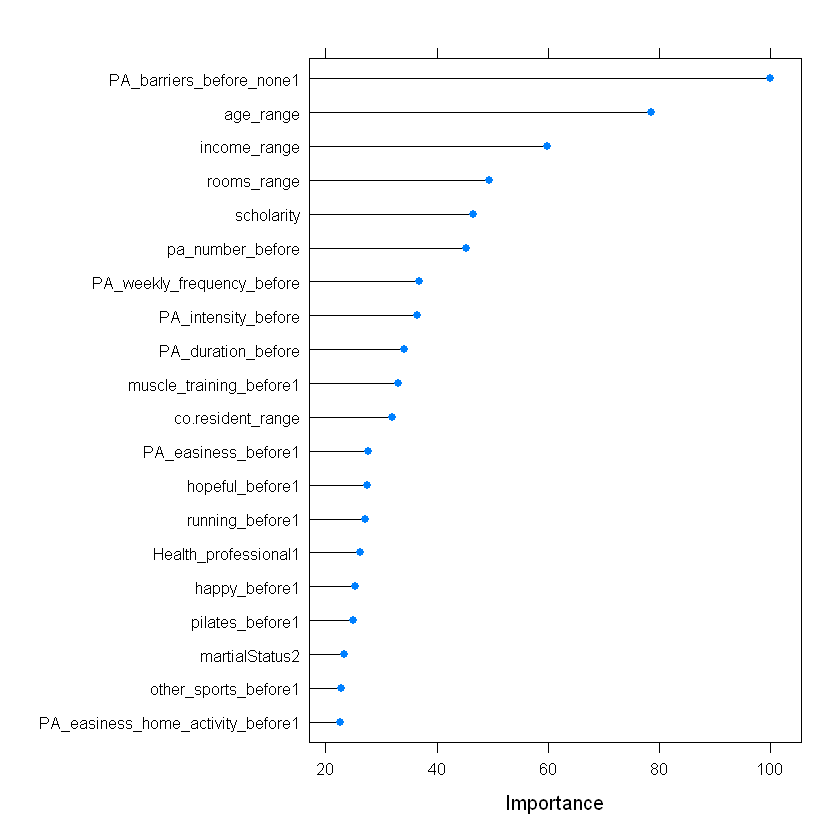

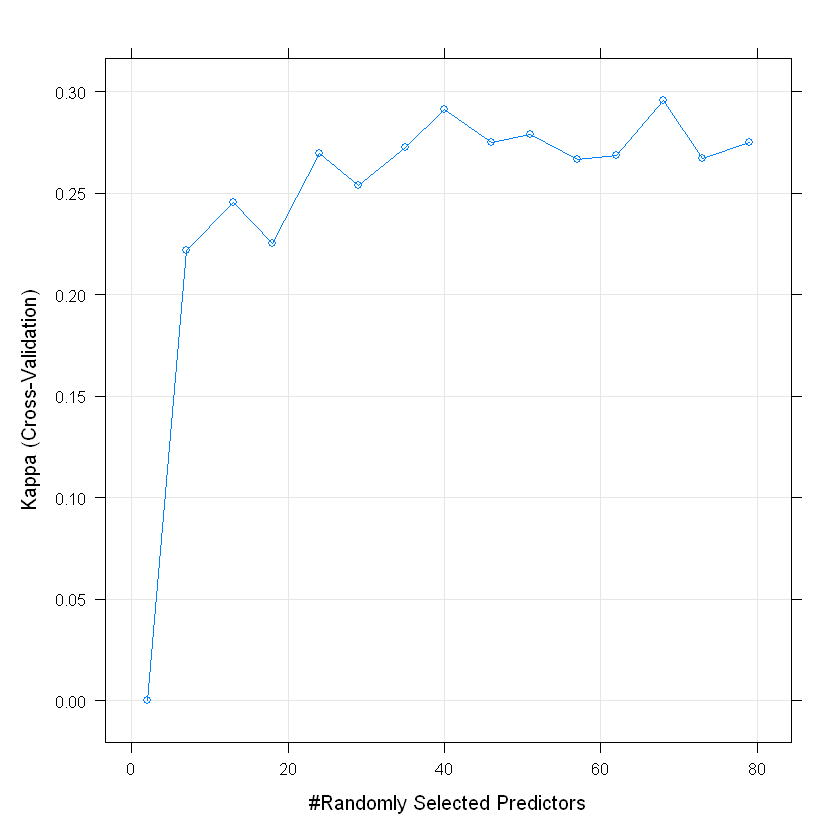

In [ ]:
plot(varImp(model$result), top=20)
plot(model$result)

#### RF: Kappa with antoher probability threshold

Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"


[1] 0.68
Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  183  43
       yes  87  59
                                         
               Accuracy : 0.6505         
                 95% CI : (0.5997, 0.699)
    No Information Rate : 0.7258         
    P-Value [Acc > NIR] : 0.9993971      
                                         
                  Kappa : 0.2259         
                                         
 Mcnemar's Test P-Value : 0.0001624      
                                         
            Sensitivity : 0.6778         
            Specificity : 0.5784         
         Pos Pred Value : 0.8097         
         Neg Pred Value : 0.4041         
              Precision : 0.8097         
                 Recall : 0.6778         
                     F1 : 0.7379         
             Prevalence : 0.7258         
         Detection Rate : 0.4919         
   Detection Prevalence : 0.6075         
      Balanced Accuracy : 0.6281         

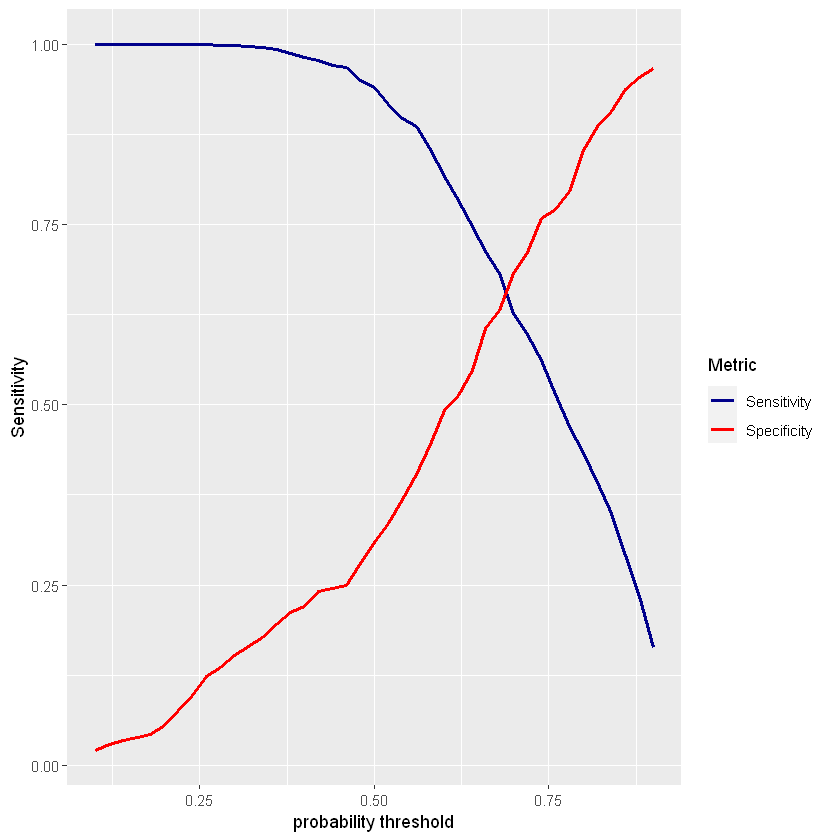

In [16]:
set.seed(2)
model <- fit_model_thresholder(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid",  classProbs=TRUE, savePredictions=TRUE),
    train_data = hard_work_barriers_train,
    test_data=hard_work_barriers_test,
    yname="PA_barrier_hard_work",
    length = 15,
    best_th = f2
)
print(model$matrix)


#### Output: Practice of exercise during

In [43]:
pa_bf_dataset <- pa_dataset[, c(barriers, "PA_practice_during")]
dim(pa_bf_dataset)

[1] 1242   19

### Output Barrier: places barrier

In [5]:
head(places_barrier_dataset)
summary(places_barrier_dataset[, "PA_barrier_places"])

,sex,age_range,martialStatus,co.resident_range,rooms_range,income_range,scholarity,diabetes,hypertension,dyslipidemia,...,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_barrier_places,pa_number_before
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,2,1,1,1,4,4,0,1,0,...,0,0,0,0,1,0,0,0,yes,1
2,2,3,1,2,3,6,4,0,0,0,...,0,1,0,0,0,0,0,0,yes,4
3,1,3,1,2,2,5,3,0,0,0,...,0,0,0,1,0,0,0,0,yes,2
4,1,3,1,1,1,3,4,0,0,0,...,0,0,0,0,1,0,0,0,yes,2
5,1,2,2,2,2,6,4,0,0,0,...,1,0,0,0,0,0,0,0,yes,2
6,2,3,2,2,2,6,6,0,0,0,...,1,0,0,0,0,0,0,0,no,3


no yes 
615 627

####  Outliers

- Outlier: Strange Dont Practice

In [ ]:
places_barrier_dataset_copy <-places_barrier_dataset
places_barrier_dataset_copy["outlier"] <- strange_dp
outliers_result_sdp <- outliers_checker(distances_sdp,places_barrier_dataset_copy, "PA_barrier_places")

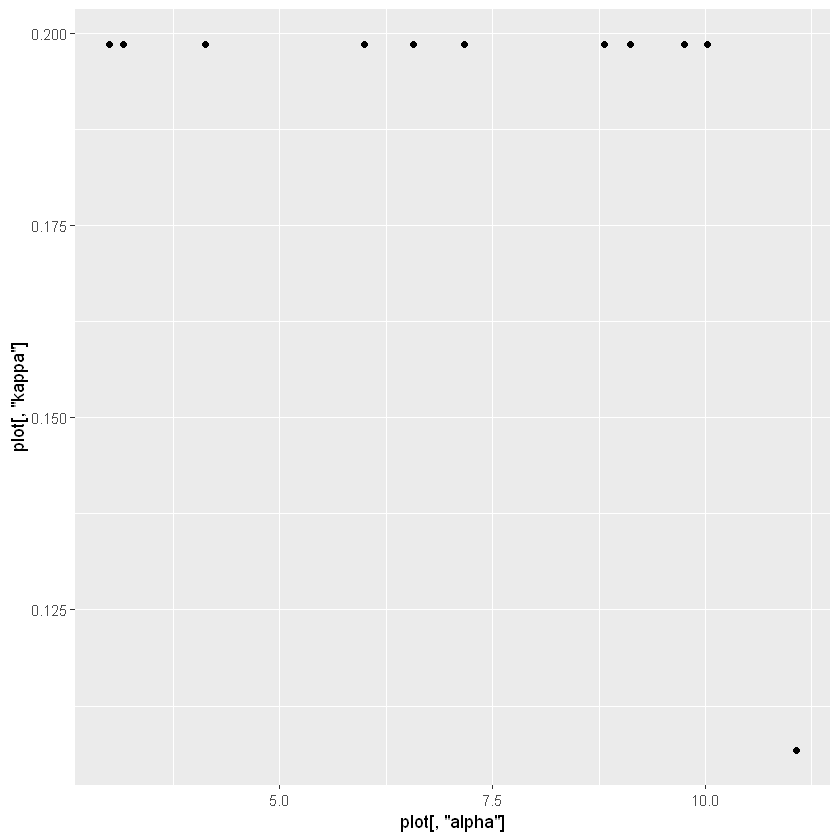

In [7]:
plot <- outliers_result_sdp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

- Outlier: Strange Practice

In [ ]:
places_barrier_dataset_copy <-places_barrier_dataset
places_barrier_dataset_copy["outlier"] <- strange_p
outliers_result_sp <- outliers_checker(distances_sp,places_barrier_dataset_copy, "PA_barrier_places")

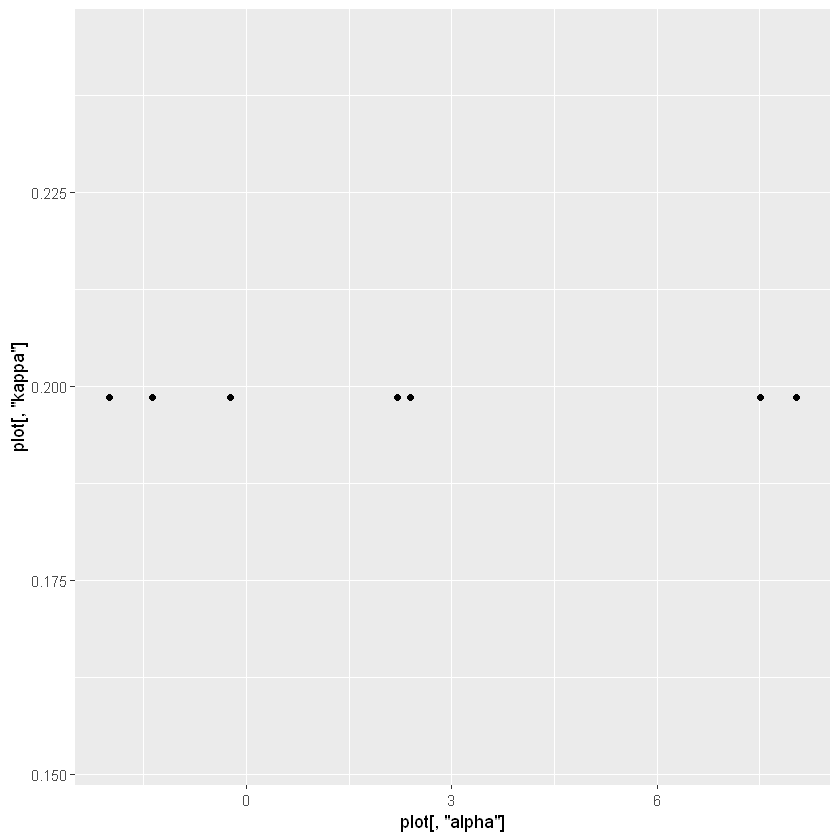

In [9]:
plot <- outliers_result_sp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

- New Train and Test:
The outliers check in the strange dont need to delete records

In [10]:
places_barriers_train <- outliers_result_sdp$best_model$train
places_barriers_test <- outliers_result_sdp$best_model$test

#### RF: Kappa with 50% of probability threshold

In [11]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = places_barriers_train,
    test_data=places_barriers_test,
    yname="PA_barrier_places",
    length = 15
)
print(model$matrix)


Setting levels: control = 1, case = 2

Setting direction: controls < cases



Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  110  62
       yes  74 126
                                          
               Accuracy : 0.6344          
                 95% CI : (0.5832, 0.6835)
    No Information Rate : 0.5054          
    P-Value [Acc > NIR] : 3.587e-07       
                                          
                  Kappa : 0.2682          
                                          
 Mcnemar's Test P-Value : 0.3456          
                                          
            Sensitivity : 0.5978          
            Specificity : 0.6702          
         Pos Pred Value : 0.6395          
         Neg Pred Value : 0.6300          
              Precision : 0.6395          
                 Recall : 0.5978          
                     F1 : 0.6180          
             Prevalence : 0.4946          
         Detection Rate : 0.2957          
   Detection Prevalence : 0.4624          
      Balanced Accuracy : 0.63

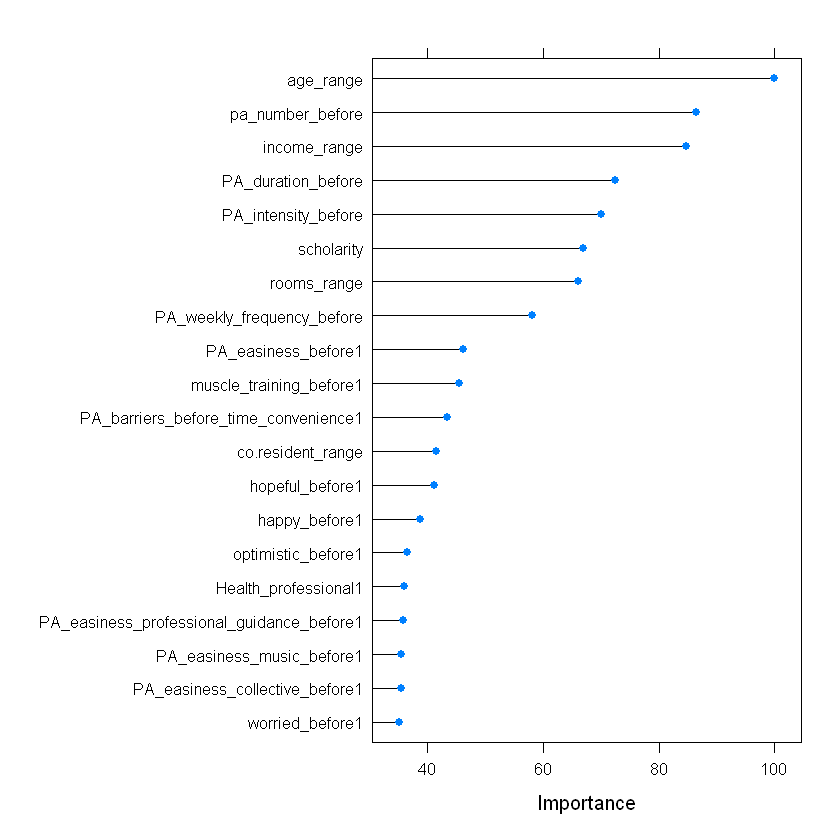

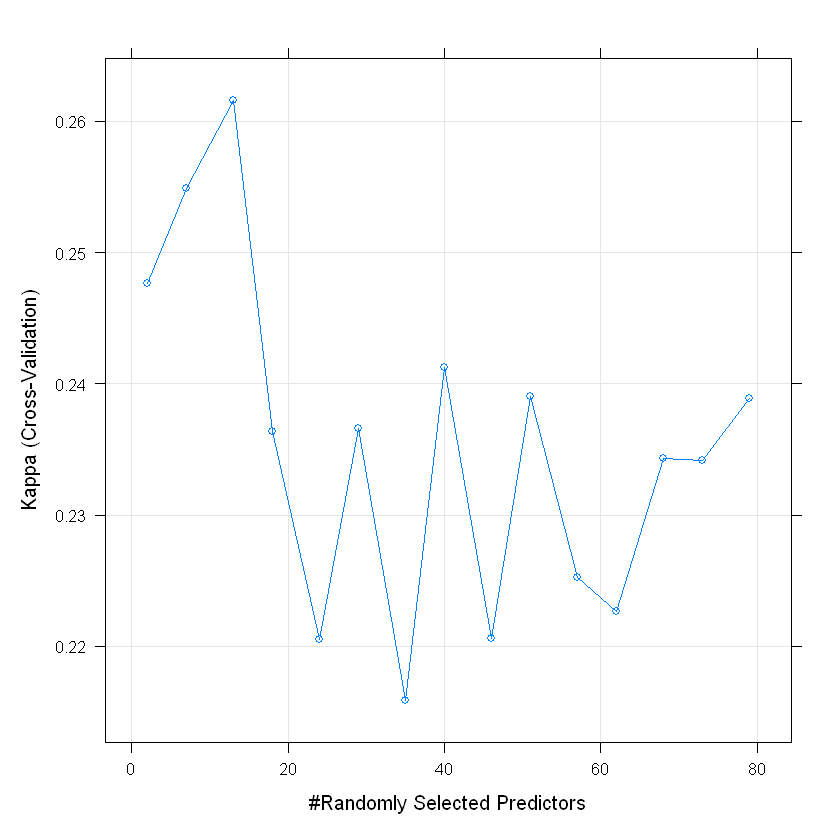

In [12]:
plot(varImp(model$result), top=20)
plot(model$result)

#### RF: Kappa with antoher probability threshold

Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"


[1] 0.5
Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  110  63
       yes  74 125
                                          
               Accuracy : 0.6317          
                 95% CI : (0.5805, 0.6809)
    No Information Rate : 0.5054          
    P-Value [Acc > NIR] : 6.142e-07       
                                          
                  Kappa : 0.2629          
                                          
 Mcnemar's Test P-Value : 0.3929          
                                          
            Sensitivity : 0.5978          
            Specificity : 0.6649          
         Pos Pred Value : 0.6358          
         Neg Pred Value : 0.6281          
              Precision : 0.6358          
                 Recall : 0.5978          
                     F1 : 0.6162          
             Prevalence : 0.4946          
         Detection Rate : 0.2957          
   Detection Prevalence : 0.4651          
      Balanced Accurac

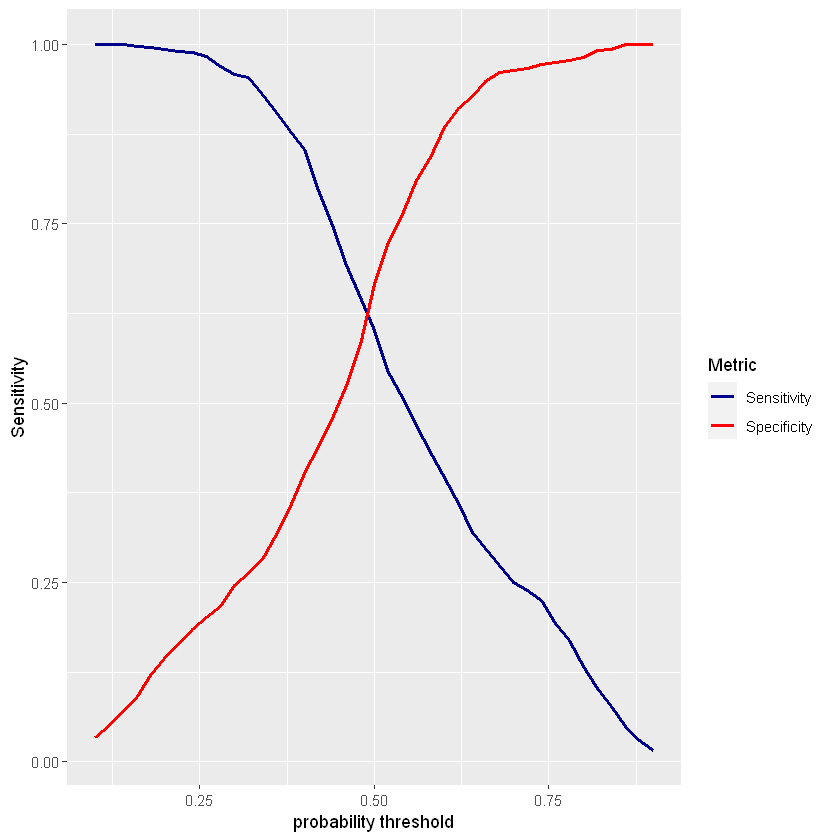

In [13]:
set.seed(2)
model <- fit_model_thresholder(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid",  classProbs=TRUE, savePredictions=TRUE),
    train_data = places_barriers_train,
    test_data=places_barriers_test,
    yname="PA_barrier_places",
    length = 15,
    best_th = f2
)
print(model$matrix)
